#### Task: place 7 queens and 1 knight on a chess board in such a way that no piece is under attack from any other piece.

Naive Solution
If we iterate through all possible positions for the 7 pieces, we end up with ~ $64^7$ (worst case) variants. Given that $10^7$ is a feasible number of iterations for computer, a slight optimization should make the naive algorithm practical.

#### Slight Optimizations:

1) Use a set to represent available (not under attack) cells on the chess board. 
2) When placing a queen on the board, remove form set all cells that come under attack by this queen.
3) For subsequent queens, iterate only over the available cells in the set.

#### Queen Attack Cells

A queen can attack horizontally and diagonally on the chess board. While horizontal attacks are straightforward to determine, diagonal attacks require a bit more effort. 

To efficiently manage diagonal attacks, I can encode cell coordinates (x, y) into diagonal index, using the following formulas:

- Straight Diagonal Index = chess_board_size - x + y - 1
- Reverse Diagonal Index = n_diagonals - x - y - 1

For board size of 8, there are 30 diagonals in total: 15 straight and 15 reversed. I create a dictionary, where each diagonal index maps to a list of cell coordinates that fall on that diagonal.

In [1]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_QUEENS = 7
CHESS_BOARD_SIZE = 8
N_DIAGONALS = 2 * (2 * CHESS_BOARD_SIZE - 1)
DIAGONALS = dict(([i, []] for i in range(N_DIAGONALS)))
CHESS_BOARD = set()


def get_straight_diagonal_id(i, j):
    return CHESS_BOARD_SIZE - i + j - 1


def get_reverse_diagonal_idx(i, j):
    return N_DIAGONALS - i - j - 1


for x in range(CHESS_BOARD_SIZE):
    for y in range(CHESS_BOARD_SIZE):
        CHESS_BOARD.add((x, y))

        straight_diagonal_idx = get_straight_diagonal_id(x, y)
        reverse_diagonal_idx = get_reverse_diagonal_idx(x, y)

        DIAGONALS[straight_diagonal_idx].append((x, y))
        DIAGONALS[reverse_diagonal_idx].append((x, y))

In [3]:
DIAGONALS

{0: [(7, 0)],
 1: [(6, 0), (7, 1)],
 2: [(5, 0), (6, 1), (7, 2)],
 3: [(4, 0), (5, 1), (6, 2), (7, 3)],
 4: [(3, 0), (4, 1), (5, 2), (6, 3), (7, 4)],
 5: [(2, 0), (3, 1), (4, 2), (5, 3), (6, 4), (7, 5)],
 6: [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6)],
 7: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7)],
 8: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)],
 9: [(0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7)],
 10: [(0, 3), (1, 4), (2, 5), (3, 6), (4, 7)],
 11: [(0, 4), (1, 5), (2, 6), (3, 7)],
 12: [(0, 5), (1, 6), (2, 7)],
 13: [(0, 6), (1, 7)],
 14: [(0, 7)],
 15: [(7, 7)],
 16: [(6, 7), (7, 6)],
 17: [(5, 7), (6, 6), (7, 5)],
 18: [(4, 7), (5, 6), (6, 5), (7, 4)],
 19: [(3, 7), (4, 6), (5, 5), (6, 4), (7, 3)],
 20: [(2, 7), (3, 6), (4, 5), (5, 4), (6, 3), (7, 2)],
 21: [(1, 7), (2, 6), (3, 5), (4, 4), (5, 3), (6, 2), (7, 1)],
 22: [(0, 7), (1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1), (7, 0)],
 23: [(0, 6), (1, 5), (2, 4), (3, 3), (4, 2), (5,

In [4]:
def get_queen_attack_coords(i, j):
    coords = {
        *DIAGONALS[get_straight_diagonal_id(i, j)],
        *DIAGONALS[get_reverse_diagonal_idx(i, j)],
    }
    for k in range(CHESS_BOARD_SIZE):
        coords.add((i, k))
        coords.add((k, j))
    return coords


def get_knight_attack_coords(i, j):
    knight_steps = [
        (-2, 1),
        (-2, -1),
        (2, 1),
        (2, -1),
        (1, 2),
        (-1, 2),
        (1, -2),
        (-1, -2),
    ]
    coords = set()
    for s_i, s_j in knight_steps:
        coords.add((i + s_i, j + s_j))
    return coords

#### Some Visualizations

In [5]:
def get_attack_board(queens_coords, free_cell=None):
    if free_cell is None:
        chess_board = np.ones((CHESS_BOARD_SIZE, CHESS_BOARD_SIZE))
        for q_cord in queens_coords:
            for attack_i, attack_j in get_queen_attack_coords(*q_cord):
                chess_board[attack_i][attack_j] = 0
    else:
        chess_board = np.zeros((CHESS_BOARD_SIZE, CHESS_BOARD_SIZE))
        for c in free_cell:
            chess_board[c] = 1

    for i, j in queens_coords:
        chess_board[i][j] = 2
    return chess_board


def visualize_chess_board(
    attack_map, title="Chess Board with Attack Map", show_colorbar=True
):
    cmap = plt.cm.colors.ListedColormap(["white", "grey", "red"])
    bounds = [-0.5, 0.5, 1.5, 2.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(attack_map, cmap=cmap, norm=norm, interpolation="nearest")
    plt.title(title)

    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, CHESS_BOARD_SIZE, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, CHESS_BOARD_SIZE, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1.5)

    if show_colorbar:
        cbar = plt.colorbar(ticks=[0, 1, 2])
        cbar.set_ticklabels(["cell under attack", "free cell", "queen"])

    plt.show()


def visualize_diagonal(i, j, straight=True):
    if straight:
        diagonal_idx = get_straight_diagonal_id(i, j)
    else:
        diagonal_idx = get_reverse_diagonal_idx(i, j)

    chess_board = np.ones((CHESS_BOARD_SIZE, CHESS_BOARD_SIZE))
    for c_i, c_j in DIAGONALS[diagonal_idx]:
        chess_board[c_i][c_j] = 0
    chess_board[i][j] = 2

    visualize_chess_board(
        chess_board, title=f"Diagonal {diagonal_idx}", show_colorbar=False
    )

#### Visualizing Diagonals

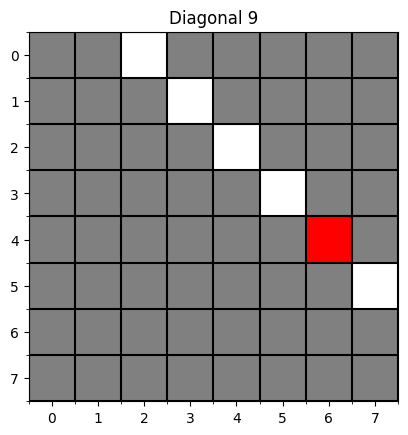

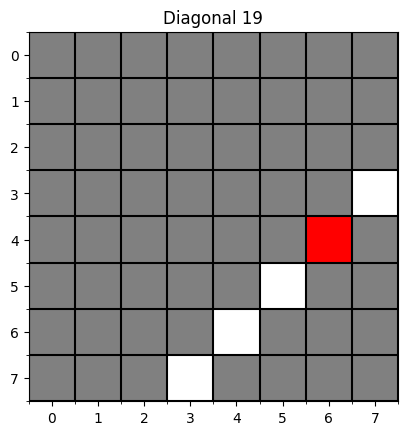

In [6]:
cell_coords = 4, 6
visualize_diagonal(*cell_coords, straight=True)
visualize_diagonal(*cell_coords, straight=False)

#### Visualizing Queen Attack Map

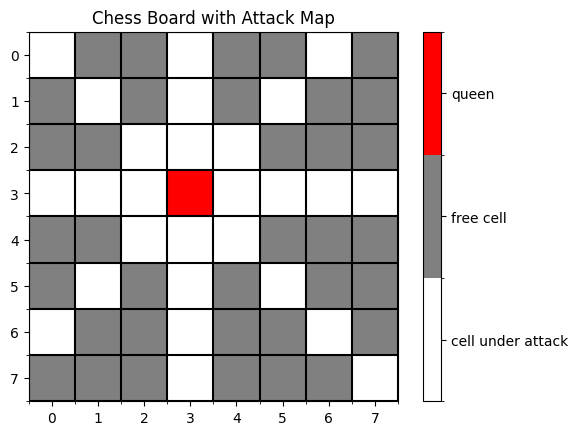

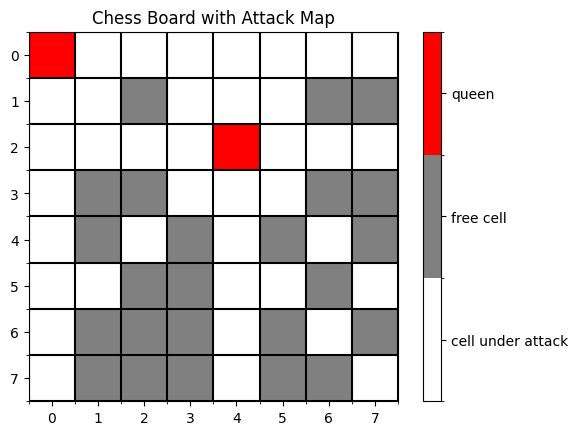

In [7]:
test_queens_coords = [(3, 3)]
test_attack_map = get_attack_board(test_queens_coords)
visualize_chess_board(test_attack_map)

test_queens_coords = [(0, 0), (2, 4)]
test_attack_map = get_attack_board(test_queens_coords)
visualize_chess_board(test_attack_map)

#### Knight Attack Map

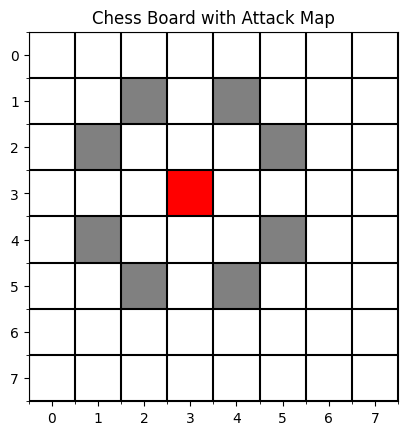

In [8]:
knight_coord = 3, 3
coords = get_knight_attack_coords(*knight_coord)
knight_attack_map = get_attack_board([], coords)
knight_attack_map[knight_coord] = 2
visualize_chess_board(knight_attack_map, show_colorbar=False)

## Naive Solution

*Here just queens arrangement

In [9]:
available_coords = []  # last available (free) cell for each arrangement
coords_of_placed_queens = []  # 7 coordinates of placed queens for each arrangement
both_coords = []  # all 8 coords for each arrangement


def put_queen(cur_available_coords, cur_queens_coords):
    if len(cur_available_coords) < N_QUEENS + 1 - len(cur_queens_coords):
        return  # I need available cells for queens and 1 knight

    if len(cur_queens_coords) == N_QUEENS:
        available_coords.append(cur_available_coords)
        coords_of_placed_queens.append(cur_queens_coords)
        both_coords.append(set.union(cur_available_coords, cur_queens_coords))
        return

    for i, queen_coord in enumerate(cur_available_coords):
        board = cur_available_coords.copy()
        queens_coords = cur_queens_coords.copy()
        queens_coords.add(queen_coord)

        for queen_attack_coords in get_queen_attack_coords(*queen_coord):
            board.discard(queen_attack_coords)

        put_queen(board, queens_coords)

    return

It takes 2-3 minutes to run =)

In [10]:
%%time

available_coords.clear()
coords_of_placed_queens.clear()
both_coords.clear()

chess_board_copy = CHESS_BOARD.copy()
put_queen(chess_board_copy, cur_queens_coords=set())

CPU times: user 2min 13s, sys: 1.71 s, total: 2min 14s
Wall time: 2min 15s


let's see, how many total queen placements we have. And visualize one of it:

In total: 3709440 arrangements

queens coords: {(2, 4), (6, 2), (5, 6), (1, 0), (3, 7), (7, 5), (4, 1)}
cell not under attack: {(0, 3)}


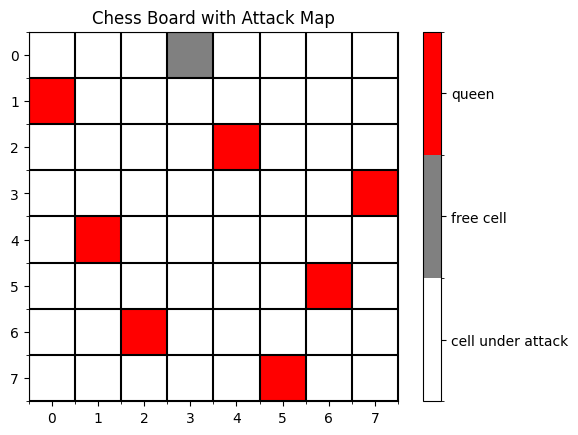

In [11]:
N = len(coords_of_placed_queens)
print(f"In total: {N} arrangements\n")

board_idx = 111244
print("queens coords:", coords_of_placed_queens[board_idx])
print("cell not under attack:", available_coords[board_idx])

attack_map_to_show = get_attack_board(
    coords_of_placed_queens[board_idx], available_coords[board_idx]
)
visualize_chess_board(attack_map_to_show)

Well, 3709440 arrangements for 7 queens is a quite big number. Probably the permutations of 7 identical queens are taken into account here.

In [12]:
fact_7 = factorial(7)
print(N / fact_7)

# I can check the number of unique queen placements
sorted_queens = set(
    map(lambda q_coords: tuple(sorted(q_coords)), coords_of_placed_queens)
)
print(len(sorted_queens))

736.0
736


Moreover, I can place another 8th queen on the free cell. It means, I have 8 permutations for each arrangement.

In [13]:
print(N / (fact_7 * 8))

# check value with set
sorted_both = set(map(lambda b_coords: tuple(sorted(b_coords)), both_coords))
print(len(sorted_both))

92.0
92


And let's check, that I allways have one available cell for each arrangement

In [14]:
length_of_available_cells = [len(a_coord) for a_coord in available_coords]
print("In total:", len(length_of_available_cells))
print("With one free cell:", length_of_available_cells.count(1))

In total: 3709440
With one free cell: 3709440


And let's visualize board, where I can place a knight on the free cell

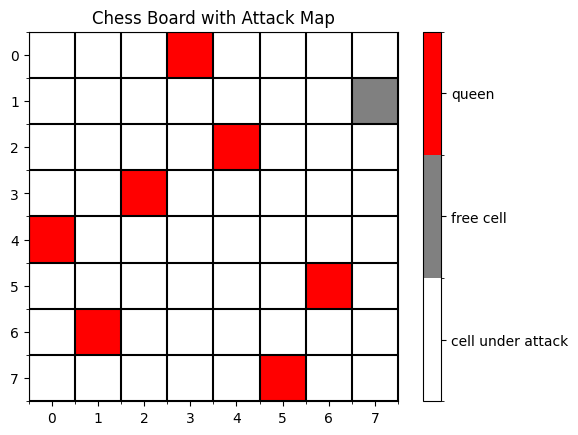

In [15]:
board_idx = 11111
attack_map_to_show = get_attack_board(
    coords_of_placed_queens[board_idx], available_coords[board_idx]
)
visualize_chess_board(attack_map_to_show)

#### Ideas for Optimization

1) queens permutations: speed up in factorial 7 times
2) queens and free cell permutations: speed up in factorial 8 times (I will check 8 knights placements by the constant time for each arrangement)
3) Maybe I can place knight first and then 7 queens. But I don't know, how to take account arrangements in this case.
4) I can also speed up in 4 times if I rotate the board by 90, 180 and 270 degrees. But also I have problem with the arrangements.

let's do something with permutations (second point).

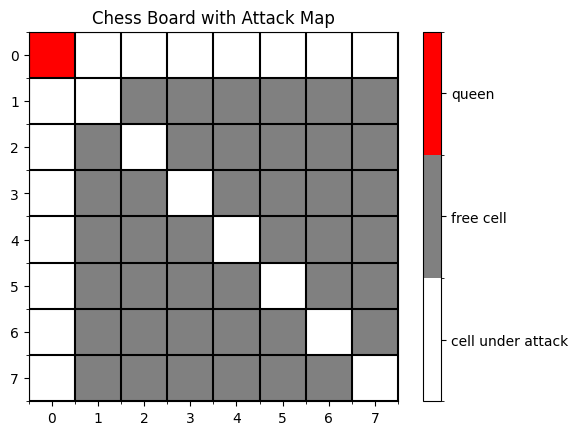

In [16]:
test_queens_coords = [(0, 0)]
test_attack_map = get_attack_board(test_queens_coords)
visualize_chess_board(test_attack_map)

When I place the first queen and remove current all attack cells, __other queens will be placed on each available cell__*. So, it means that there is no need to place the first queen on those available cells. I just need to iterate first queen over its attack cells. The second queen over its attack cells, and so on.

\* If I place other queens only on their attacking squares, I will not visit each available cells. For example with two queens:

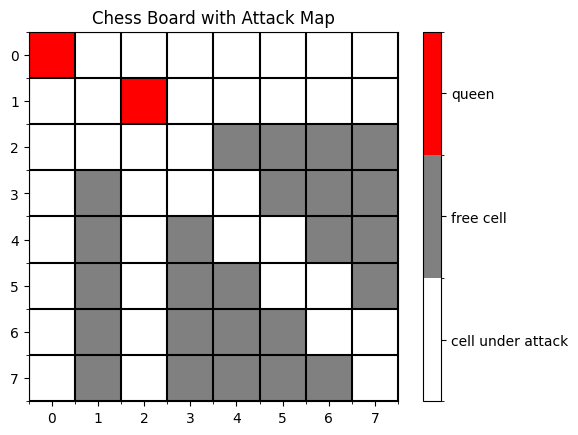

In [17]:
test_queens_coords = [(0, 0), (1, 2)]
test_attack_map = get_attack_board(test_queens_coords)
visualize_chess_board(test_attack_map)

Well, I missed a lot of combination (I will not visit all free cells). But it with 2 queens. Let's try with 7 queens:

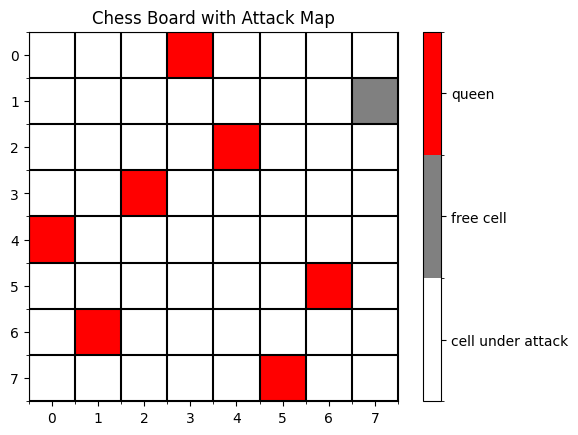

In [18]:
board_idx = 11111
attack_map_to_show = get_attack_board(
    coords_of_placed_queens[board_idx], available_coords[board_idx]
)
visualize_chess_board(attack_map_to_show)

I can miss only 1 cell, and it's exactly what I need, because this cell is not under attack and I can place a knight on it, and I accelerate the algorithm in 8! times.

And last thing - there is a problem with intersecting attack cells of queens:

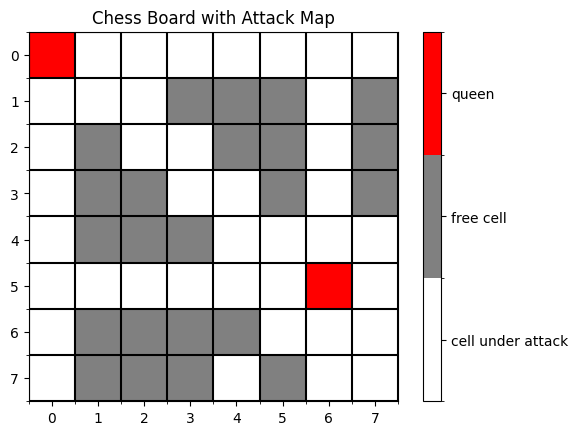

In [19]:
test_queens_coords = [(0, 0), (5, 6)]
test_attack_map = get_attack_board(test_queens_coords)
visualize_chess_board(test_attack_map)

Both queens attack for example (0, 6) and (5, 0) cells: 

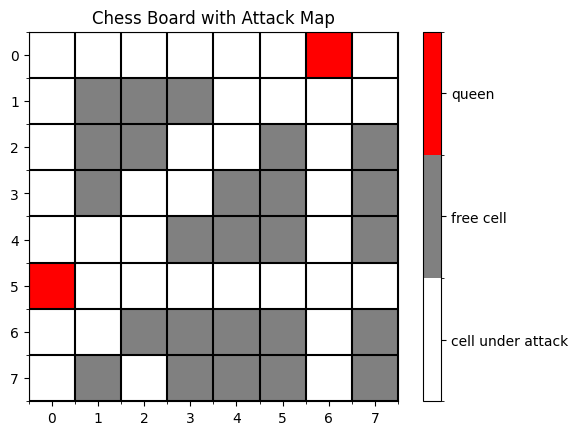

In [20]:
test_queens_coords = [(0, 6), (5, 0)]
test_attack_map = get_attack_board(test_queens_coords)
visualize_chess_board(test_attack_map)

To avoid this permutation, I can just forbid to place second queen on the cells, which were visited by the first queen. And so on.

## acceleration 8! times

In [21]:
queens_coords = []
knights_coords = []


def permutate_queens_and_knight(coords: list):
    for i, j in coords:
        knight_attack_coords = get_knight_attack_coords(i, j)
        is_any_queen_under_knight_attack = any(
            map(lambda x: x in knight_attack_coords, coords)
        )
        if not is_any_queen_under_knight_attack:
            coords_copy = coords.copy()
            coords_copy.remove((i, j))
            queens_coords.append(coords_copy)
            knights_coords.append((i, j))


def put_queen(cur_available_coords: set, cur_queens_coords: list):
    if len(cur_available_coords) < N_QUEENS + 1 - len(cur_queens_coords):
        return
    if len(cur_queens_coords) == N_QUEENS:
        cur_queens_coords.append(cur_available_coords.pop())  # add last available cell
        permutate_queens_and_knight(cur_queens_coords)
        return

    coords = cur_available_coords.pop()
    cur_available_coords.add(coords)

    for queen_coord in get_queen_attack_coords(*coords):
        if queen_coord not in cur_available_coords:
            continue

        cur_available_coords.discard(
            queen_coord
        )  # forbid to place other queens on this cells

        board = cur_available_coords.copy()
        queens_coords = cur_queens_coords.copy()
        queens_coords.append(queen_coord)

        for queen_attack_coords in get_queen_attack_coords(*queen_coord):
            board.discard(queen_attack_coords)

        put_queen(board, queens_coords)

    return

In [22]:
%%timeit

queens_coords.clear()
knights_coords.clear()

chess_board_copy = CHESS_BOARD.copy()
put_queen(chess_board_copy, [])

130 ms ± 3.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
N = len(queens_coords)
print(f"All in all - {N} available arrangements of 7 queens and 1 knight.")

All in all - 104 available arrangements of 7 queens and 1 knight.


In [24]:
# check permutations with set
sorted_queens = set(map(lambda q_coords: tuple(sorted(q_coords)), queens_coords))
print(len(sorted_queens))

104


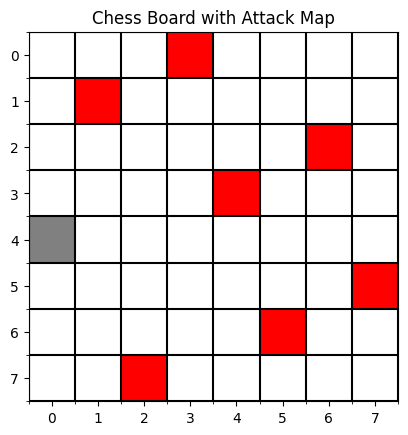

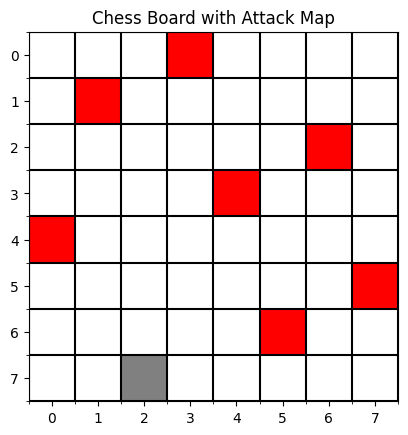

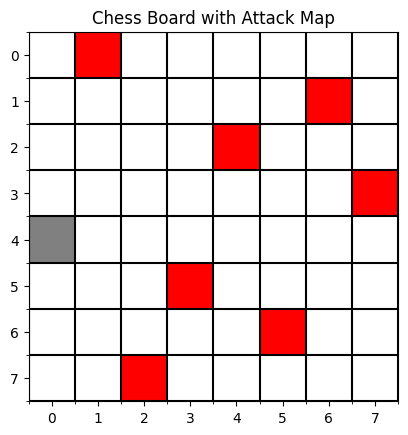

In [25]:
# some possible arrangements (queens are red and knight is grey):

for board_idx in range(3):
    attack_map_to_show = get_attack_board(queens_coords[board_idx])
    visualize_chess_board(attack_map_to_show, show_colorbar=False)

## Solution with itertools

In [26]:
import itertools

knight_moves = [(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]


def check_all_diagonals(positions):
    diagonals = set()

    for pos_lhs, pos_rhs in positions:
        st_diagonal_idx = get_straight_diagonal_id(pos_lhs, pos_rhs)
        rev_diagonal_idx = get_reverse_diagonal_idx(pos_lhs, pos_rhs)
        if (st_diagonal_idx in diagonals) or (rev_diagonal_idx in diagonals):
            return False
        diagonals.add(st_diagonal_idx)
        diagonals.add(rev_diagonal_idx)
    return True


def is_valid_knight_place(knight_place, occupied_positions):
    """Function to check if a position is valid for a knight"""
    for knight_move in knight_moves:
        new_pos = (knight_place[0] + knight_move[0], knight_place[1] + knight_move[1])
        if new_pos in occupied_positions:
            return False
    return True


def get_n_valid_positions(n):
    """Place n-1 queen and 1 knight"""
    # Generate all possible queen positions
    queen_positions = itertools.permutations(range(n))

    # Count the valid positions
    valid_positions = 0

    for queens in queen_positions:
        occupied_positions = [(i, queens[i]) for i in range(n)]
        if not check_all_diagonals(occupied_positions):
            continue
        for pos in occupied_positions:
            if is_valid_knight_place(pos, occupied_positions):
                valid_positions += 1

    return valid_positions

In [27]:
%timeit get_n_valid_positions(CHESS_BOARD_SIZE)

52.5 ms ± 750 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
print("total arrangements:", get_n_valid_positions(CHESS_BOARD_SIZE))

total arrangements: 104
